In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(

    rescale=1./255,

    rotation_range=40,

    width_shift_range=0.2,

    height_shift_range=0.2,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True,

    fill_mode='nearest'

)

validation_datagen = ImageDataGenerator(

    rescale=1./255

)

TRAIN_DIRECTORY_LOCATION = '/content/drive/MyDrive/Colab Notebooks/archive/train'
VAL_DIRECTORY_LOCATION = '/content/drive/MyDrive/Colab Notebooks/archive/test'
TARGET_SIZE = (224,224)
CLASS_MODE = 'categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 50,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 50,
    class_mode = CLASS_MODE
)

Found 250 images belonging to 50 classes.
Found 50 images belonging to 50 classes.


In [22]:
model = tf.keras.models.Sequential([

   # Find the features with Convolutions and Pooling

   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),

   tf.keras.layers.MaxPooling2D(2, 2),

   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

   tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

   tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),

   tf.keras.layers.MaxPooling2D(2,2),

   # Flatten the results to feed into a DNN

   tf.keras.layers.Flatten(),

   # 512 neuron hidden layer

   tf.keras.layers.Dense(512, activation='relu'),

   tf.keras.layers.Dense(50, activation='softmax')

])


# This will print a summary of your model when you're done!
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,560,786 (36.47 MB)

 Trainable params: 9,560,786 (36.47 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.optimizers import RMSprop

LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'
#OPTIMIZER = RMSprop(lr=0.0001)


model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0099 - loss: 4.0799

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 11s/step - accuracy: 0.0096 - loss: 4.0770 - val_accuracy: 0.0200 - val_loss: 3.9080
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.0033 - loss: 3.9159 - val_accuracy: 0.0200 - val_loss: 3.9070
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 51s 10s/step - accuracy: 0.0248 - loss: 3.9111 - val_accuracy: 0.0200 - val_loss: 3.9026
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 9s/step - accuracy: 0.0183 - loss: 3.9025 - val_accuracy: 0.0200 - val_loss: 3.8761
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 9s/step - accuracy: 0.0217 - loss: 3.8726 - val_accuracy: 0.0600 - val_loss: 3.7866
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 9s/step - accuracy: 0.0309 - loss: 3.7954 - val_accuracy: 0.0800 - val_loss: 3.5961
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 9s/step - accuracy: 0.0767 - loss: 3.6330 - val_accuracy: 0.1400 - val_loss: 3.2857
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 9s/step - accuracy: 0.1606 - loss: 3.3479 - val_accuracy: 0.2200 - val_loss: 3.0603
Epoch 9/20
5/5 ━━

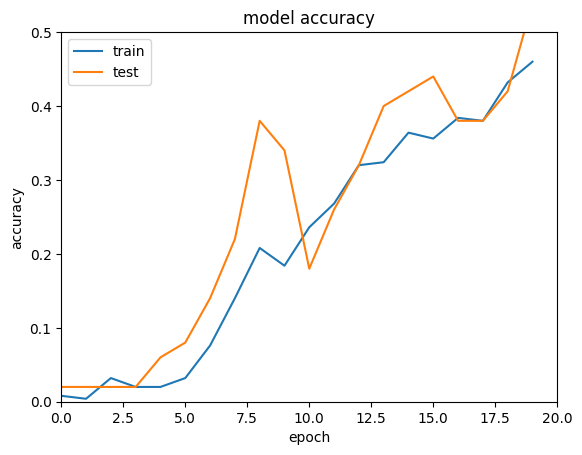

In [24]:
NUM_EPOCHS = 20

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0,0.5])
plt.show()